In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/home/gui/hf_dev/datatrove/blogpost/data/commoncrawl_new_fixed_dumps.csv")

In [18]:
grouped = df.groupby('runname')

# Define a function to take the top 6 rows of each group
def top_6_avg(group):
    # Sort the group by "steps" in descending order
    sorted_group = group.sort_values(by='steps', ascending=False)
    # Take the top 6 rows
    top_6 = sorted_group.head(6)
    # Calculate the average of "agg_score"
    avg_score = top_6['agg_score'].mean()
    return avg_score

def top_6_stats(group):
    # Sort the group by "steps" in descending order
    sorted_group = group.sort_values(by='steps', ascending=False)
    # Take the top 6 rows
    top_6 = sorted_group.head(6)
    # Calculate the average of "agg_score"
    avg_score = top_6['agg_score'].mean()
    # Calculate the standard deviation of "agg_score"
    std_dev = top_6['agg_score'].std()
    return pd.Series({'avg': avg_score, 'std_dev': std_dev})

# Apply the function to each group and aggregate the results
result = grouped.apply(top_6_stats)

/tmp/ipykernel_25844/3603367824.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = grouped.apply(top_6_stats)


In [19]:
result

avg   std_dev
runname                    
2013-20  0.420114  0.001650
2013-48  0.417714  0.002167
2014-10  0.422538  0.002143
2014-15  0.421505  0.002825
2014-23  0.420056  0.001364
...           ...       ...
2023-14  0.432792  0.004059
2023-23  0.433109  0.001656
2023-40  0.432743  0.003919
2023-50  0.433199  0.001750
2024-10  0.435825  0.001774

[95 rows x 2 columns]

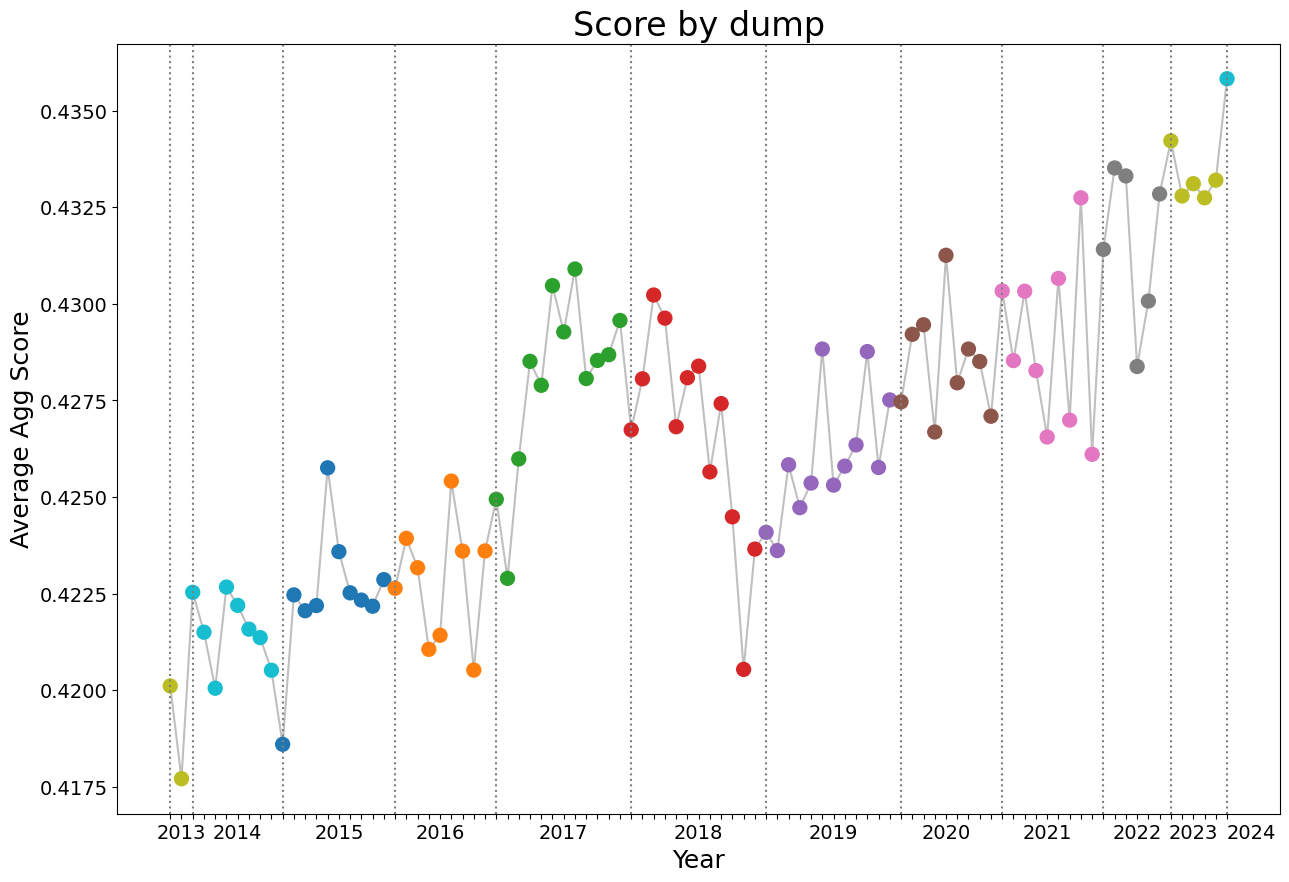

In [24]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming you have already computed the result DataFrame

# Sort the result DataFrame by "runname"
result_sorted = result.sort_index()
colors = result_sorted.index.str.split('-').str[0].astype(int)

cmap = plt.cm.tab10

# Create a new colormap without transparency
new_colors = cmap(np.linspace(0, 1, cmap.N))
new_colors = np.concatenate((new_colors[-2:], new_colors))
new_cmap = mcolors.ListedColormap(new_colors)
rgba_colors = new_cmap(new_colors)


# Plotting
plt.figure(figsize=(15, 10))
# Join the points with a line
plt.plot(range(len(result_sorted)), result_sorted["avg"], linestyle='-', color='gray', alpha=0.5, zorder=1)
scatter = plt.scatter(range(len(result_sorted)), result_sorted["avg"], c=colors, cmap=new_cmap, marker='o', s=100, zorder=2)

norm = plt.Normalize(min(colors), max(colors))

import matplotlib.cm as cm
# Creating a ScalarMappable object with the tab20 colormap and normalization
sm = cm.ScalarMappable(cmap=new_cmap, norm=norm)

plt.xlabel('Year', fontsize=18)
plt.ylabel('Average Agg Score', fontsize=18)
plt.title('Score by dump', fontsize=24)
plt.xticks(range(len(result_sorted)), colors, ha='center', fontsize=14)
plt.yticks(fontsize=14)
ax = plt.gca()

# for i in range(len(result_sorted)):
#     plt.errorbar(i, result_sorted.iloc[i]['avg'], yerr=result_sorted.iloc[i]['std_dev'], fmt='o', color=sm.to_rgba(colors[i]), markersize=0, capsize=5)
prev = None
labels = ax.xaxis.get_ticklabels()
# labels[0].set_horizontalalignment('right')
lines = []
for x, name in enumerate(colors.tolist()):
    if name != prev:
        plt.axvline(x=x, color='grey', linestyle=':')
        lines.append(x)
    prev = name

mids = np.floor((np.array(lines[:-1]) + np.array(lines[1:])) / 2)
for x in range(len(colors) - 1):
    if x not in mids:
        labels[x].set_visible(False)
labels[-1].set_horizontalalignment('left')
    

# plt.grid(True)
plt.savefig("/home/gui/hf_dev/datatrove/blogpost/plots/score_by_dump.png", bbox_inches='tight', dpi=300)
plt.show()

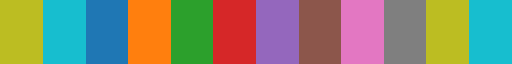

In [21]:
    
new_colors = cmap(np.linspace(0, 1, cmap.N))
new_colors = np.concatenate((new_colors[-2:], new_colors))
mcolors.ListedColormap(new_colors)

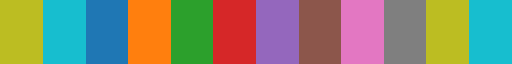

In [22]:
new_cmap

Flipped axis